In [1]:
rstate=10

In [2]:
import string 
import seaborn as sns
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
import io

In [3]:
df = pd.read_csv(r"G:\OneDrive - northsouth.edu\CODES\PROJECTS\PROJECT-CSE299-CYBERBULLYING PREVENTION-DETECTION and MENTAL COUNSELING SYSTEM\Machine Learning Models\Bengali hate speech.csv")
df.sample(frac=1)

,sentence,hate,category
25856,স্যার আপনি নাকি মইরা গেছেন😱😱,0,celebrity
14143,শাবনুর আপু মোটা হওয়ার পরেও এত সুন্দর লাগে বর্...,0,entertainment
13131,"অনেক দিন পরে মহা নায়িকা শাবনুর এর ছবি, খুব ভাল...",0,entertainment
8412,#চে## বা#গুলা খুব শিঘ্রী কাটবো।।।আমরা একাই কাট...,1,celebrity
22352,আয় ভাই হাতে হাত মিলাই🤝🤝🤝❤,0,politics
...,...,...,...
9676,এই গাধার দল ওখানে রাম মন্দির ছিল আগে আলোচোনা হ...,1,"Meme, TikTok and others"
14287,"এগুকা কোন বালও হয়না,,",0,entertainment
21324,তাকে বলে বি বাড়িয়ার সাহসী মেয়ে যে কাউকে পরো...,0,politics
17499,বাংলাদেশ সরকার কে বলছি জেলের ভাত নষ্ট করার চেয...,0,crime


In [4]:
import string

In [5]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
def remove_punctuation_from_sentence(sentence):
    sentence_without_punctuation="".join([c for c in sentence if c not in string.punctuation])
    return sentence_without_punctuation

In [7]:
c

,sentence,hate,category,sentence without punctuation
0,যত্তসব পাপন শালার ফাজলামী!!!!!,1,sports,যত্তসব পাপন শালার ফাজলামী
1,পাপন শালা রে রিমান্ডে নেওয়া দরকার,1,sports,পাপন শালা রে রিমান্ডে নেওয়া দরকার
2,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এটা...,1,sports,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এটা...
3,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়,1,sports,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়
4,তুই তো শালা গাজা খাইছচ।তুর মার হেডায় খেলবে সাকিব,1,sports,তুই তো শালা গাজা খাইছচ।তুর মার হেডায় খেলবে সাকিব


In [8]:
from bnlp import BasicTokenizer
from bnlp.corpus import stopwords, punctuations, letters, digits
from bnlp.corpus.util import remove_stopwords

In [9]:
basic_tokenizer = BasicTokenizer()
df['tokenized_sentence'] = df['sentence without punctuation'].apply(lambda x: basic_tokenizer.tokenize(x))
df.head()

,sentence,hate,category,sentence without punctuation,tokenized_sentence
0,যত্তসব পাপন শালার ফাজলামী!!!!!,1,sports,যত্তসব পাপন শালার ফাজলামী,"[যত্তসব, পাপন, শালার, ফাজলামী]"
1,পাপন শালা রে রিমান্ডে নেওয়া দরকার,1,sports,পাপন শালা রে রিমান্ডে নেওয়া দরকার,"[পাপন, শালা, রে, রিমান্ডে, নেওয়া, দরকার]"
2,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এটা...,1,sports,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এটা...,"[জিল্লুর, রহমান, স্যারের, ছেলে, এতো, বড়, জারজ,..."
3,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়,1,sports,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়,"[শালা, লুচ্চা, দেখতে, পাঠার, মত, দেখা, যায়]"
4,তুই তো শালা গাজা খাইছচ।তুর মার হেডায় খেলবে সাকিব,1,sports,তুই তো শালা গাজা খাইছচ।তুর মার হেডায় খেলবে সাকিব,"[তুই, তো, শালা, গাজা, খাইছচ, ।, তুর, মার, হেডা..."


In [10]:
df['Removed Stopped word'] = df['sentence without punctuation'].apply(lambda x: remove_stopwords(x,stopwords))
df.head()

,sentence,hate,category,sentence without punctuation,tokenized_sentence,Removed Stopped word
0,যত্তসব পাপন শালার ফাজলামী!!!!!,1,sports,যত্তসব পাপন শালার ফাজলামী,"[যত্তসব, পাপন, শালার, ফাজলামী]","[যত্তসব, পাপন, শালার, ফাজলামী]"
1,পাপন শালা রে রিমান্ডে নেওয়া দরকার,1,sports,পাপন শালা রে রিমান্ডে নেওয়া দরকার,"[পাপন, শালা, রে, রিমান্ডে, নেওয়া, দরকার]","[পাপন, শালা, রে, রিমান্ডে, দরকার]"
2,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এটা...,1,sports,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এটা...,"[জিল্লুর, রহমান, স্যারের, ছেলে, এতো, বড়, জারজ,...","[জিল্লুর, রহমান, স্যারের, ছেলে, এতো, বড়, জারজ,..."
3,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়,1,sports,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়,"[শালা, লুচ্চা, দেখতে, পাঠার, মত, দেখা, যায়]","[শালা, লুচ্চা, পাঠার, মত, যায়]"
4,তুই তো শালা গাজা খাইছচ।তুর মার হেডায় খেলবে সাকিব,1,sports,তুই তো শালা গাজা খাইছচ।তুর মার হেডায় খেলবে সাকিব,"[তুই, তো, শালা, গাজা, খাইছচ, ।, তুর, মার, হেডা...","[তুই, শালা, গাজা, খাইছচ, ।, তুর, মার, হেডায়, খ..."


In [11]:
df['hate_speech']=df['Removed Stopped word'].apply(' '.join)

In [12]:
x=df['hate_speech']
y=df['hate']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=rstate)

In [14]:
cv = CountVectorizer(stop_words = stopwords)
cv.fit(x)

# transform the training and testing data using count vectorizer object
X_train_count =  cv.transform(X_train)
X_test_count =  cv.transform(X_test)

#Tfid transformer
tfidf_tr = TfidfTransformer()
X_train_count_tfidf = tfidf_tr.fit_transform(X_train_count)
X_test_count_tfidf = tfidf_tr.transform(X_test_count)

# ngram level tf-idf 
tv_ngram = TfidfVectorizer(ngram_range=(1,2))
tv_ngram.fit(x)
X_train_tfidf_ngram =  tv_ngram.transform(X_train)
X_test_tfidf_ngram =  tv_ngram.transform(X_test)

In [15]:
def classifierModel(classifier, Xtrain, Ytrain, Xtest,roc):
    classifier.fit(Xtrain, Ytrain)
    predictions = classifier.predict(Xtest)
    print(30*'=')
    print(f"Accuracy : {accuracy_score(predictions, y_test)*float(100)}%")
    print(30*'=')
    if roc:
        probs = classifier.predict_proba(X_test_count_tfidf)
        preds = probs[:,1]
        fpr_svm, tpr_svm, threshold_svm = metrics.roc_curve(y_test, preds)
        roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)

        import matplotlib.pyplot as plt
        plt.title(type(classifier).__name__)
        plt.plot(fpr_svm, tpr_svm, 'b', label = 'AUC = %0.2f' % roc_auc_svm)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
    
    target_names = ['class 0', 'class 1']
    print(classification_report(y_test, predictions, target_names=target_names))


LINEAR SVM


LinearSVM with Count Vectors: 
Accuracy : 71.7%


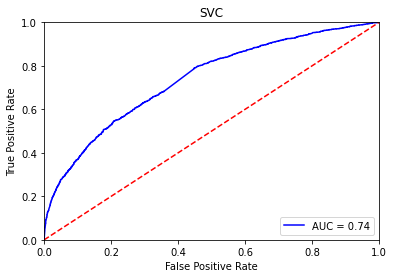

              precision    recall  f1-score   support

     class 0       0.72      0.93      0.81      3982
     class 1       0.69      0.29      0.41      2018

    accuracy                           0.72      6000
   macro avg       0.71      0.61      0.61      6000
weighted avg       0.71      0.72      0.68      6000


LinearSVM with Count Vectors + TF-IDF: 
Accuracy : 73.01666666666667%


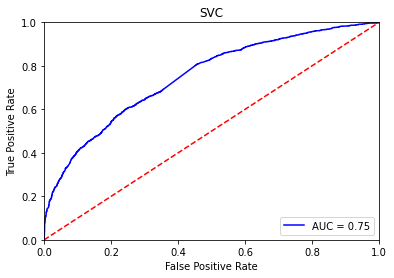

              precision    recall  f1-score   support

     class 0       0.73      0.94      0.82      3982
     class 1       0.73      0.31      0.44      2018

    accuracy                           0.73      6000
   macro avg       0.73      0.63      0.63      6000
weighted avg       0.73      0.73      0.69      6000


LinearSVM with N-Gram Vectors: 
Accuracy : 73.7%
              precision    recall  f1-score   support

     class 0       0.74      0.94      0.83      3982
     class 1       0.73      0.34      0.47      2018

    accuracy                           0.74      6000
   macro avg       0.74      0.64      0.65      6000
weighted avg       0.74      0.74      0.71      6000



In [16]:
print("\nLinearSVM with Count Vectors: ")
classifierModel(SVC(kernel='linear', probability=True), X_train_count, y_train, X_test_count,roc=True)

print("\nLinearSVM with Count Vectors + TF-IDF: ")
classifierModel(SVC(kernel='linear', probability=True), X_train_count_tfidf, y_train, X_test_count_tfidf,roc=True)

print("\nLinearSVM with N-Gram Vectors: ")
classifierModel(SVC(kernel='linear', probability=True), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram,roc=False)

NAIVE BAYES


Naive Bayes with Count Vectors: 
Accuracy : 71.93333333333334%


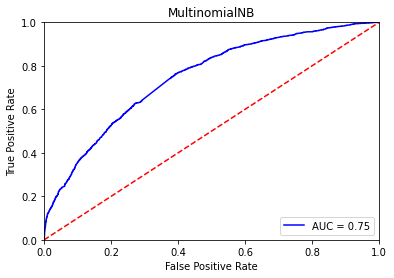

              precision    recall  f1-score   support

     class 0       0.75      0.87      0.80      3982
     class 1       0.62      0.42      0.50      2018

    accuracy                           0.72      6000
   macro avg       0.69      0.65      0.65      6000
weighted avg       0.71      0.72      0.70      6000


Naive Bayes with Count Vectors + TF-IDF: 
Accuracy : 71.39999999999999%


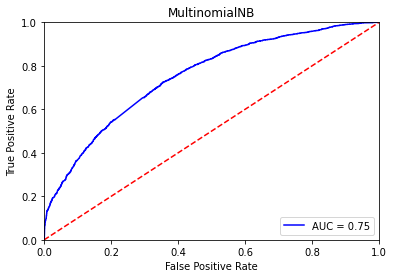

              precision    recall  f1-score   support

     class 0       0.71      0.95      0.82      3982
     class 1       0.73      0.24      0.36      2018

    accuracy                           0.71      6000
   macro avg       0.72      0.60      0.59      6000
weighted avg       0.72      0.71      0.66      6000


Naive Bayes with N-Gram Vectors: 
Accuracy : 70.7%
              precision    recall  f1-score   support

     class 0       0.70      0.99      0.82      3982
     class 1       0.91      0.14      0.25      2018

    accuracy                           0.71      6000
   macro avg       0.80      0.57      0.53      6000
weighted avg       0.77      0.71      0.63      6000



In [17]:
print("\nNaive Bayes with Count Vectors: ")
classifierModel(MultinomialNB(), X_train_count, y_train, X_test_count,roc=True)

print("\nNaive Bayes with Count Vectors + TF-IDF: ")
classifierModel(MultinomialNB(), X_train_count_tfidf, y_train, X_test_count_tfidf,roc=True)

print("\nNaive Bayes with N-Gram Vectors: ")
classifierModel(MultinomialNB(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram,roc=False)

RANDOM FOREST


Random Forrest Classifier with Count Vectors: 
Accuracy : 72.6%


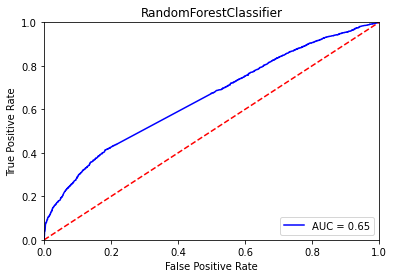

              precision    recall  f1-score   support

     class 0       0.75      0.88      0.81      3982
     class 1       0.64      0.42      0.51      2018

    accuracy                           0.73      6000
   macro avg       0.70      0.65      0.66      6000
weighted avg       0.71      0.73      0.71      6000


Random Forrest Classifier with Count Vectors + TF-IDF: 
Accuracy : 73.06666666666666%


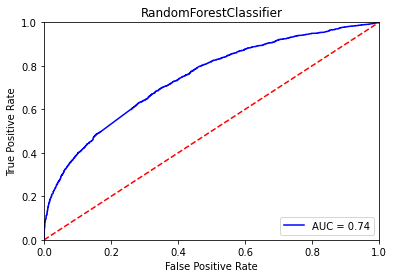

              precision    recall  f1-score   support

     class 0       0.74      0.91      0.82      3982
     class 1       0.69      0.37      0.48      2018

    accuracy                           0.73      6000
   macro avg       0.71      0.64      0.65      6000
weighted avg       0.72      0.73      0.70      6000


Random Forrest Classifier with N-Gram Vectors: 


In [18]:
print("\nRandom Forrest Classifier with Count Vectors: ")
classifierModel(RandomForestClassifier(random_state=rstate,n_estimators=512), X_train_count, y_train, X_test_count,roc=True)

print("\nRandom Forrest Classifier with Count Vectors + TF-IDF: ")
classifierModel(RandomForestClassifier(random_state=rstate,n_estimators=512), X_train_count_tfidf, y_train, X_test_count_tfidf,roc=True)

print("\nRandom Forrest Classifier with N-Gram Vectors: ")
classifierModel(RandomForestClassifier(random_state=rstate,n_estimators=512), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram,roc=False)

LOGISTIC REGRESSION

In [ ]:
print("\nLogistic Regression with Count Vectors: ")
classifierModel(LogisticRegression(), X_train_count, y_train, X_test_count,roc=True)

print("\nLogistic Regression with Count Vectors + TF-IDF: ")
classifierModel(LogisticRegression(), X_train_count_tfidf, y_train, X_test_count_tfidf,roc=True)

print("\nLogistic Regression with N-Gram Vectors: ")
classifierModel(LogisticRegression(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram,roc=False)